In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from ipywidgets import interact, widgets


wine_production_path = "Resources/wine-production.csv"
global_temps_path = "Resources/GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv"

wine_production_data = pd.read_csv(wine_production_path)
global_temps_data = pd.read_csv(global_temps_path)


In [3]:
#Cleaning up GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv
unique_countries_wine = wine_production_data['Entity'].unique()

#clean up global_temps_data and return only relevant years
global_temps_data['dt'] = pd.to_datetime(global_temps_data['dt'])
global_temps_data_1961 = global_temps_data[global_temps_data['dt']>='1961-01-01']
#global_temps_data_1961

global_temps_data_1961['Year'] = ""
global_temps_data_1961['Year'] = global_temps_data_1961['dt'].dt.year

global_temps_data_1961['AverageTemperature'] = (global_temps_data_1961['AverageTemperature'] * 9/5) + 32

global_temps_grouped_mean = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].mean()
global_temps_grouped_median = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].median()
global_temps_grouped_max = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].max()
global_temps_grouped_min = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].min()
global_temps_grouped_std = global_temps_data_1961.groupby(["Country","Year"])['AverageTemperature'].std()


global_temps = pd.DataFrame({
    "Average Temperature (F°)" : global_temps_grouped_mean,
    "Minimum Temperature (F°)" : global_temps_grouped_min,
    "Maximum Temperature (F°)" : global_temps_grouped_max,
    "Median Temperature (F°)" : global_temps_grouped_median,
    "Standard Deviation" : global_temps_grouped_std
})


global_temps.to_csv("Resources/global_temps.csv", index_label="Country")

global_temps


#merged_data = pd.merge(wine_production_data, global_temps_data, on="Country", how="inner")


#merge_data = pd.merge(wine_production_data, global_temps_data, how="inner", left_on="Entity", right_on="Country")
#merge_data


#unique_countries_wine
#create new data frame with global temp. Group by country, year and calculate the mean, max, min temps. left_on=year. right_on = country
#1. group by country 
#2. group by year

#inner join will filter out rows


C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_6280\3220025381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_temps_data_1961['Year'] = ""
C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_6280\3220025381.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_temps_data_1961['Year'] = global_temps_data_1961['dt'].dt.year
C:\Users\Andrew Koller\AppData\Local\Temp\ipykernel_6280\3220025381.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Average Temperature (F°)  Minimum Temperature (F°)  \
Country     Year                                                       
Afghanistan 1961                  57.31685                   34.6676   
            1962                  56.78360                   33.1088   
            1963                  59.06015                   36.5000   
            1964                  55.55285                   24.3428   
            1965                  57.38330                   35.7746   
...                                    ...                       ...   
Åland       2009                  43.68035                   27.4208   
            2010                  40.75145                   20.4512   
            2011                  44.90735                   20.4980   
            2012                  42.91505                   25.7828   
            2013                  43.21355                   23.3978   

                  Maximum Temperature (F°)  Median Temperature (F°)  \
Country     Year                                                      
Afghanistan 1961                   81.2534                  54.9734   
            1962                   80.5298                  56.7563   
            1963                   81.0428                  60.2582   
            1964                   79.6460                  54.9059   
            1965                   80.1968                  58.1990   
...                                    ...                      ...   
Åland       2009                   61.5614                  42.0377   
            2010                   66.4142                  40.5590   
            2011                   64.4054                  45.4982   
            2012                   60.8900                  43.2572   
            2013                   61.6046                  42.8252   

                  Standard Deviation  
Country     Year                      
Afghanistan 1961           17.431491  
            1962           16.458718  
            1963           15.942641  
            1964           18.722815  
            1965           16.117239  
...                              ...  
Åland       2009           12.200169  
            2010           16.086607  
            2011           13.866469  
            2012           12.236111  
            2013           16.240937  

[12879 rows x 5 columns]

In [4]:
#Cleaning up wine production data
wine_production_data['Wine | 00000564 || Production | 005510 || tonnes'] = (wine_production_data['Wine | 00000564 || Production | 005510 || tonnes'] * 0.90718474).round(2)

In [5]:
#Merging wine-production.csv with global_temps.csv
merge_data = pd.merge(wine_production_data, global_temps, how="inner", left_on=["Entity",'Year'], right_on=["Country", 'Year'])

merge_data.rename(columns={'': 'Sheet Index', 'Entity': 'Country','Year': 'Year', 'Wine | 00000564 || Production | 005510 || tonnes': 'Wine Production (tons)'}, inplace=True)
merge_data
merge_data.to_csv("Resources/merge_data.csv", index_label="Country")


In [6]:
#Seperating data by regions and country
country_data_df = merge_data.dropna(subset=['Code'])
country_data_df.to_csv("Resources/country_data_df.csv", index_label="Country")
country_data_df



,Country,Code,Year,Wine Production (tons),Average Temperature (F°),Minimum Temperature (F°),Maximum Temperature (F°),Median Temperature (F°),Standard Deviation
53,Albania,ALB,1961,3229.58,55.97015,38.4458,71.9996,57.4232,12.240442
54,Albania,ALB,1962,4145.83,55.52375,37.1516,75.4592,55.6619,13.481548
55,Albania,ALB,1963,2078.36,55.55450,35.0384,73.7420,54.8222,13.397239
56,Albania,ALB,1964,2784.15,54.52760,33.8558,70.7504,55.0877,12.662470
57,Albania,ALB,1965,3643.25,54.28115,33.2618,73.1498,52.7630,12.910885
...,...,...,...,...,...,...,...,...,...
2976,Zimbabwe,ZWE,2009,1587.57,70.47905,59.4212,76.5158,72.4748,5.551294
2977,Zimbabwe,ZWE,2010,1587.57,71.57525,61.4786,78.6974,73.9472,6.000668
2978,Zimbabwe,ZWE,2011,1587.57,70.88435,60.4454,77.9378,73.2956,5.843389
2979,Zimbabwe,ZWE,2012,1587.57,70.73840,60.8864,76.2908,73.4819,5.532541


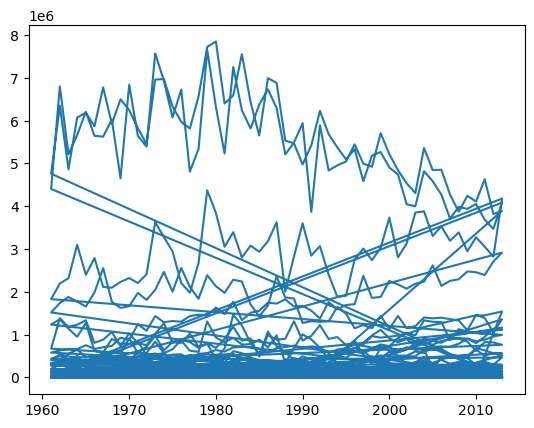

In [9]:
plt.plot(country_data_df['Year'],country_data_df['Wine Production (tons)'])
plt.show()